In [1]:
#Written by  Bailey WHO ALREADY VOLUNTEERED TWICE!!
#AWESOME JOB BAILEY...
#YOU ALL HAVE TO STEP IT UP! 

In [2]:
from __future__ import print_function, division
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#generate data points in a straight line
#need to know equation for a line --> y=ax+b
np.random.seed(1006)

def line(x, a, b):
    #add offset to each data point to rep statistical error - normal dist
    e = np.random.randn(len(x)) * 7
    return a * x +  b + e, e

In [4]:
x = np.arange(0.,20.,2)
x

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.])

In [5]:
values, errors = line(x, 2, 5)

Text(0,0.5,'Y')

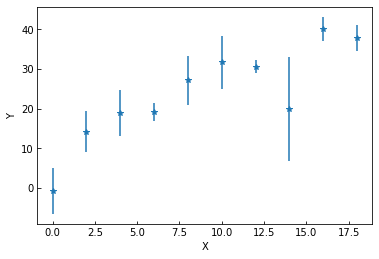

In [6]:
pl.errorbar(x, values, yerr = errors, fmt = '*')
pl.xlabel('X')
pl.ylabel('Y')

In [7]:
import statsmodels.api as sm

In [8]:
X = sm.add_constant(x) #added a trivial dimension of 1.s to pass a 2d x

In [9]:
X

array([[  1.,   0.],
       [  1.,   2.],
       [  1.,   4.],
       [  1.,   6.],
       [  1.,   8.],
       [  1.,  10.],
       [  1.,  12.],
       [  1.,  14.],
       [  1.,  16.],
       [  1.,  18.]])

In [10]:
ols_obj = sm.OLS(values, X) #doesn't do anything; returns a type of object that stats model knows

In [11]:
our_model = ols_obj.fit() #returns our model, solution to that problem

In [12]:
x_new = np.arange(22)

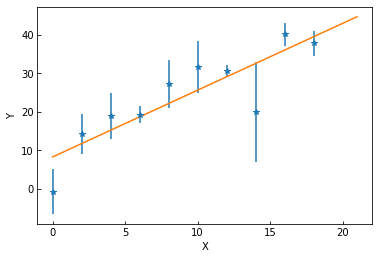

In [13]:
pl.errorbar(x, values, yerr = errors, fmt = '*')
pl.xlabel('X')
pl.ylabel('Y')

pl.plot(x_new, our_model.predict(sm.add_constant(x_new)))

In [14]:
our_model.summary() #tells you how well your model fits data

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     22.91
Date:                Thu, 06 Oct 2016   Prob (F-statistic):            0.00138
Time:                        22:37:57   Log-Likelihood:                -31.924
No. Observations:                  10   AIC:                             67.85
Df Residuals:                       8   BIC:                             68.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          8.2594      3.871      2.134      0.065        -0.668    17.186
x1             1.7353      0.363      4.786      0.001         0.899     2.571
==============================================================================
Omnibus:                        4.222   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                2.080
Skew:                          -1.116   Prob(JB):                        0.354
Kurtosis:                       2.893   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
import statsmodels.formula.api as smf

In [16]:
wls_obj = smf.WLS(values, X, weights=1.0 / np.abs(errors)) #weighted, least sq object
our_w_model = wls_obj.fit()  #returns model that fits least fit obj
our_w_model.params
1.0 / errors

array([-0.17108415,  0.19251005,  0.16910918,  0.45364542,  0.16193404,
        0.14885868,  0.61348551, -0.0764904 ,  0.32315307, -0.30901169])

In [17]:
our_w_model.summary()

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1557: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            WLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     47.01
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           0.000130
Time:                        22:37:57   Log-Likelihood:                -29.213
No. Observations:                  10   AIC:                             62.43
Df Residuals:                       8   BIC:                             63.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          8.1928      3.002      2.729      0.026         1.270    15.116
x1             1.8305      0.267      6.856      0.000         1.215     2.446
==============================================================================
Omnibus:                        2.156   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.340   Jarque-Bera (JB):                1.446
Skew:                          -0.811   Prob(JB):                        0.485
Kurtosis:                       2.085   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

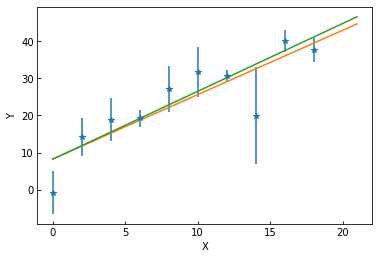

In [18]:
pl.errorbar(x, values, yerr = errors, fmt = '*')
pl.xlabel('X')
pl.ylabel('Y')

pl.plot(x_new, our_model.predict(sm.add_constant(x_new)))
pl.plot(x_new, our_w_model.predict(sm.add_constant(x_new)))

In [29]:
import numpy as np
import statsmodels.api as sm
Y = [1,3,4,5,2,3,4]
X = range(1,8)
X = sm.add_constant(X)
wls_model = sm.WLS(Y,X, weights=list([1,1,1,1,100,100,100]))
results = wls_model.fit()
results.params
results.tvalues
print(results.t_test([1, 0]))
print(results.f_test([0, 1]))


                             Test for Constraints                             
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
c0            -1.7684      1.151     -1.536      0.185        -4.728     1.191
<F test: F=array([[ 17.58453229]]), p=0.008543802261971043, df_denom=5, df_num=1>


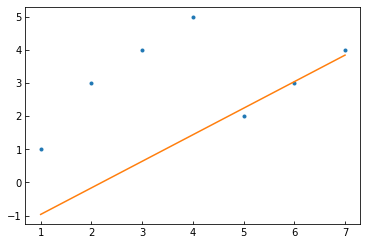

In [30]:
pl.plot(range(1,8), Y, ".")
pl.plot(range(1,8), results.predict(X), '-')